In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('max_colwidth', 400)

In [41]:
type_data = pd.read_csv("../data/prototypicality/heart_n.csv")
type_data

,sense,sentence,center.n.01,heart.n.01,heart.n.02,heart.n.03,kernel.n.03
0,center.n.01,"On the contrary , even in the heart of `` the Bible belt '' itself , as can be attested by any one who is called to work there , the industrial and technological revolutions have long been under way , together with the corresponding changes in man 's picture of himself and his world .",0.858364,0.590945,0.421943,0.537494,0.685745
1,center.n.01,"Raymond Vernon reports that residents of East St. Louis have been driving across the Mississippi , through the heart of downtown St. Louis and out to the western suburbs for major shopping , simply because parking is easier at the big branches than it is in the heart of town .",0.921553,0.500834,0.406983,0.465657,0.626638
2,center.n.01,"Raymond Vernon reports that residents of East St. Louis have been driving across the Mississippi , through the heart of downtown St. Louis and out to the western suburbs for major shopping , simply because parking is easier at the big branches than it is in the heart of town .",0.921553,0.500834,0.406983,0.465657,0.626638
3,center.n.01,They had let this black hole of death in Warsaw 's heart exist without a cry of protest .,0.743972,0.811503,0.617245,0.687736,0.625006
4,heart.n.03,Lublin was their heart .,0.612036,0.816514,0.621011,0.803187,0.664973
...,...,...,...,...,...,...,...
61,heart.n.01,With all his heart he had loved the Navy and now he must act in accordance with the Navy 's implacable laws .,0.501679,0.807477,0.529976,0.717619,0.503535
62,heart.n.01,"One did one 's best and if fortune frowned , an eighteen year old boy with murder in his heart sailed aboard one 's ship .",0.590441,0.796833,0.563190,0.701873,0.583774
63,heart.n.01,"He can even be a mild voiced little town guy with big town ideas and level gray eyes and a heart even Houdini could n't figure out , how it is unlocked .",0.498317,0.745876,0.586803,0.715173,0.587462
64,heart.n.01,"And in a way the promise works out true , for whether he wants you or not , you go with him in your heart .",0.508697,0.774219,0.504302,0.667726,0.511128


In [42]:
def true_vs_other(row):
    true_sense = row['sense']
    true_sim = row[true_sense]
    max_others = np.mean(row[[c for c in row.index if c not in [true_sense, 'sentence', 'sense']]])
    return true_sim - max_others

In [43]:
type_data['prototypicality'] = type_data.apply(true_vs_other, axis = 1)

In [44]:
type_data[['sense', 'sentence', 'prototypicality']].groupby('sense').agg('min')

,sentence,prototypicality
sense,,
center.n.01,"On the contrary , even in the heart of `` the Bible belt '' itself , as can be attested by any one who is called to work there , the industrial and technological revolutions have long been under way , together with the corresponding changes in man 's picture of himself and his world .",0.058600
heart.n.01,"And in a way the promise works out true , for whether he wants you or not , you go with him in your heart .",0.104825
heart.n.02,A still more sophisticated system has been devised for determining the effective power of the heart itself .,0.110233
heart.n.03,But what you have n't got is the heart to back up that talent with .,0.124554
kernel.n.03,"Certainly not in Orchestra hall where he has played countless recitals , and where Thursday night he celebrated his 20th season with the Chicago Symphony orchestra , playing the Brahms Concerto with his own slashing , demon-ridden cadenza melting into the high , pale , pure and lovely song with which a violinist unlocks the heart of the music , or forever finds it closed .",0.251520


In [45]:
type_data[['sense', 'sentence', 'prototypicality']].groupby('sense').agg('max')

,sentence,prototypicality
sense,,
center.n.01,They had let this black hole of death in Warsaw 's heart exist without a cry of protest .,0.421525
heart.n.01,"`` We no longer have Tom Moore 's and Longfellow 's ' heart for any fate ' , either '' , I said .",0.244275
heart.n.02,"The original electrocardiograph primarily indicates irregularities in the heartbeat , but today 's techniques allow exact measurements of the flow of blood through the aorta , dimensioning of the heart and its chambers , and a much more detailed study of each heartbeat .",0.413712
heart.n.03,"`` They require , for existence , a brave spirit and a high heart , and where do you find these ?",0.317598
kernel.n.03,The material of the Porter film is simplicity itself ; much of it has continued to be used over the years and the heart of it - good guys and bad guys in the old West - pretty well dominated television toward the end of the 1950's .,0.352114


### MFS Analysis

Could the most frequent sense be having an effect on prototypicality ratings? From discussion of "Modeling word interpretation with deep language models" by Aina et al (2020). Here, we look at the rank of the most frequent sense's centroid when computing prototypicality ratings. For vectors representing all but the MFS, we compute its cosine similarity with all the sense centroids, and extract the rank of the MFS's similarity. If we divide it by the number of senses, we get the percentile. 

We find that MFS is above the median cosine similarity for 78.5% of the vectors (1 vector for each instance).

In [139]:
def mfs_rank(row, mfs):
    other_senses = [c for c in row.index if c not in ['sentence', 'sense', 'prototypicality', 'mfs_rank']]
    sense_dists = [(c, row[c]) for c in other_senses]
    sorted_dists = sorted(sense_dists, key = lambda t: t[1])
    return ([i for i in range(len(sorted_dists)) if sorted_dists[i][0] == mfs][0] + 1) / len(other_senses)

In [112]:
def mfs_dist(type_df):
    mfs = np.argmax(type_df['sense'].value_counts())
    other_senses = type_df[type_df['sense'] != mfs]
    mfs_ranks = other_senses.apply(mfs_rank, args = (mfs,), axis = 1)
    return list(mfs_ranks)

In [132]:
mfs_pct_ranks = []
for fname in os.listdir(os.path.join('..', 'data', 'prototypicality')):
    type_df = pd.read_csv(os.path.join('..', 'data', 'prototypicality', fname))
    if type(mfs_dist(type_df)[0]) == float:
        mfs_pct_ranks += mfs_dist(type_df)


Text(0.5, 1.0, 'Distribution of MFS Rank Percentile')

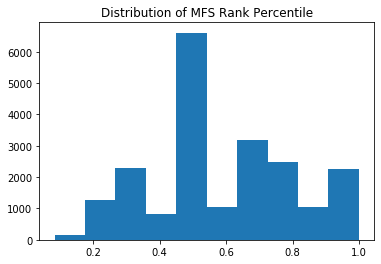

In [140]:
plt.hist(mfs_pct_ranks)
plt.title("Distribution of MFS Rank Percentile")

In [136]:
np.count_nonzero(np.array(mfs_pct_ranks) >= 0.5) / len(mfs_pct_ranks)

0.7850405583852104

## Checking against dimensionality reduced versions

In [168]:
type_data = pd.read_csv("../data/prototypicality_stimuli/school_n.csv")
type_data['prototypicality'] = type_data.apply(true_vs_other, axis = 1)

In [169]:
type_data[['sense', 'sentence', 'prototypicality']].groupby('sense').agg('min')

,sentence,prototypicality
sense,,
school.n.01,"According to the theory proposed , this is a consequence of the severe condition of perceived threat that persists unabated for the anxious child in an ambiguous sort of school environment .",-0.009508
school.n.02,"An hour of bouncing , a brief stop in a village to inspect a new school or dispensary .",0.028624
school.n.03,"During the summers , while he was still in school , Mercer worked for his father 's firm as a messenger boy .",0.047377


In [170]:
type_data[['sense', 'sentence', 'prototypicality']].groupby('sense').agg('max')

,sentence,prototypicality
sense,,
school.n.01,`` You must have been good at history at school .,0.095143
school.n.02,"What we need is to get back to the group , to learning and apprenticeship , to the cafe and the school '' .",0.088202
school.n.03,"When the family business failed , Mercer left school and on his mother 's urging - for she hoped that he would become an actor - he joined a local little theater group .",0.114084
